<a href="https://colab.research.google.com/github/Sulfika715/DeepLearning/blob/master/Inception_v1_Cocoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
EPOCHS = 100
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((224, 224))
image_size = 0
directory_root = '/content/drive/My Drive/Colab Notebooks/Tugas 3 Deep Learning/Dataset Coklat'
width=224
height=224
depth=3

In [0]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [0]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for cocoa_folder in root_dir :
        cocoa_class_folder_list = listdir(f"{directory_root}/{cocoa_folder}")
        
        for class_folder in cocoa_class_folder_list :
            # remove .DS_Store from list
            if class_folder == ".DS_Store" :
                cocoa_class_folder_list.remove(class_folder)

        for cocoa_class_folder in cocoa_classs_folder_list:
            print(f"[INFO] Processing {cocoa_class_folder} ...")
            cocoa_class_image_list = listdir(f"{directory_root}/{cocoa_folder}/{cocoa_class_folder}")
                
            for single_cocoa_class_image in cocoa_class_image_list :
                if single_cocoa_class_image == ".DS_Store" :
                    cocoa_class_image_list.remove(single_cocoa_class_image)

            for image in cocoa_class_image_list[:200]:
                image_directory = f"{directory_root}/{cocoa_folder}/{cocoa_class  _folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing Moldy_Cocoa ...
[INFO] Processing Broken_Beans_Cocoa ...
[INFO] Processing Fermented_Cocoa ...
[INFO] Processing Unfermented_Cocoa ...
[INFO] Processing Bean_Fraction_Cocoa ...
[INFO] Processing Whole_Beans_Cocoa ...
[INFO] Image loading completed


In [0]:
image_size = len(image_list)
image_size

614

In [0]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [0]:
print(label_binarizer.classes_)

['Bean_Fraction_Cocoa' 'Broken_Beans_Cocoa' 'Fermented_Cocoa'
 'Moldy_Cocoa' 'Unfermented_Cocoa' 'Whole_Beans_Cocoa']


In [0]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0

In [0]:
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 

[INFO] Spliting data to train, test


In [0]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [0]:
# Defining Inception Model

# Impor paket yang diperlukan Model
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import concatenate

# Inisialisasi Core
kernel_init = tf.keras.initializers.glorot_uniform()

# Inisialisasi offset
bias_init = tf.keras.initializers.Constant(value=0.2)


# Fungsi yang menghasilkan Modul Inception
def inception_module(x,
                     filters_1x1,
                     filters_3x3_reduce,
                     filters_3x3,
                     filters_5x5_reduce,
                     filters_5x5,
                     filters_pool_proj,
                     name=None):

    # Konvolusi 1 × 1
    conv_1x1 = Conv2D(filters_1x1,
                      (1, 1),
                      padding='same',
                      activation='relu')(x)
    conv_1x1 = BatchNormalization()(conv_1x1)

    # Konvolusi 1 × 1 untuk reduksi dimensi Konvolusi 3x3
    conv_3x3 = Conv2D(filters_3x3_reduce,
                      (1, 1),
                      padding='same',
                      activation='relu')(x)
    conv_3x3 = BatchNormalization()(conv_3x3)

    # Konvolusi 3x3
    conv_3x3 = Conv2D(filters_3x3,
                      (3, 3),
                      padding='same',
                      activation='relu')(conv_3x3)
    conv_3x3 = BatchNormalization()(conv_3x3)

    # Konvolusi 1 × 1 untuk reduksi dimensi Konvolusi 5x5
    conv_5x5 = Conv2D(filters_5x5_reduce,
                      (1, 1),
                      padding='same',
                      activation='relu')(x)
    conv_5x5 = BatchNormalization()(conv_5x5)

    # Konvolusi 5x5
    conv_5x5 = Conv2D(filters_5x5, (5, 5),
                      padding='same',
                      activation='relu')(conv_5x5)
    conv_5x5 = BatchNormalization()(conv_5x5)

    # Max pooling
    pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)

    # Konvolusi 1 × 1 untuk mencerna dimensi maksimum yang dikurangi
    pool_proj = Conv2D(filters_pool_proj,
                       (1, 1),
                       padding='same',
                       activation='relu')(pool_proj)
    pool_proj = BatchNormalization()(pool_proj)

    # Stack merge
    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)

    return output

In [0]:
# Impor paket yang diperlukan
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense


# Mendefinisikan GoogleNet / Inception-V1
class GoogleNet:
    @staticmethod
    def build(width, height, channel, classes):

        input_layer = Input(shape=(width, height, channel))

        # Inisialisasi inti
        kernel_init = tf.keras.initializers.glorot_uniform()

        # Inisialisasi offset
        bias_init = tf.keras.initializers.Constant(value=0.2)

        # Konvolusi
        x = Conv2D(64,
                   (7, 7),
                   padding='same',
                   strides=(2, 2),
                   activation='relu',
                   name='conv_1_7x7/2')(input_layer)
        x = BatchNormalization()(x)

        # Max pooling
        x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3/2')(x)

        # Konvolusi
        x = Conv2D(64,
                   (1, 1),
                   padding='same',
                   strides=(1, 1),
                   activation='relu',
                   name='conv_2a_3x3/1')(x)
        x = BatchNormalization()(x)

        # Konvolusi
        x = Conv2D(192,
                   (3, 3),
                   padding='same',
                   strides=(1, 1),
                   activation='relu',
                   name='conv_2b_3x3/1')(x)
        x = BatchNormalization()(x)

        # Max pooling
        x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_2_3x3/2')(x)

        # Inception Module
        x = inception_module(x,
                             filters_1x1=64,
                             filters_3x3_reduce=96,
                             filters_3x3=128,
                             filters_5x5_reduce=16,
                             filters_5x5=32,
                             filters_pool_proj=32,
                             name='inception_3a')

        # Inception Module
        x = inception_module(x,
                             filters_1x1=128,
                             filters_3x3_reduce=128,
                             filters_3x3=192,
                             filters_5x5_reduce=32,
                             filters_5x5=96,
                             filters_pool_proj=64,
                             name='inception_3b')

        # Max pooling
        x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_3_3x3/2')(x)

        # Inception Module
        x = inception_module(x,
                             filters_1x1=192,
                             filters_3x3_reduce=96,
                             filters_3x3=208,
                             filters_5x5_reduce=16,
                             filters_5x5=48,
                             filters_pool_proj=64,
                             name='inception_4a')

        # Inception Module
        x = inception_module(x,
                             filters_1x1=160,
                             filters_3x3_reduce=112,
                             filters_3x3=224,
                             filters_5x5_reduce=24,
                             filters_5x5=64,
                             filters_pool_proj=64,
                             name='inception_4b')

        # Inception Module
        x = inception_module(x,
                             filters_1x1=128,
                             filters_3x3_reduce=128,
                             filters_3x3=256,
                             filters_5x5_reduce=24,
                             filters_5x5=64,
                             filters_pool_proj=64,
                             name='inception_4c')

        # Inception Module
        x = inception_module(x,
                             filters_1x1=112,
                             filters_3x3_reduce=144,
                             filters_3x3=288,
                             filters_5x5_reduce=32,
                             filters_5x5=64,
                             filters_pool_proj=64,
                             name='inception_4d')

        # Inception Module
        x = inception_module(x,
                             filters_1x1=256,
                             filters_3x3_reduce=160,
                             filters_3x3=320,
                             filters_5x5_reduce=32,
                             filters_5x5=128,
                             filters_pool_proj=128,
                             name='inception_4e')

        # Max pooling
        x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_4_3x3/2')(x)

        # Inception Module
        x = inception_module(x,
                             filters_1x1=256,
                             filters_3x3_reduce=160,
                             filters_3x3=320,
                             filters_5x5_reduce=32,
                             filters_5x5=128,
                             filters_pool_proj=128,
                             name='inception_5a')

        # Inception Module
        x = inception_module(x,
                             filters_1x1=384,
                             filters_3x3_reduce=192,
                             filters_3x3=384,
                             filters_5x5_reduce=48,
                             filters_5x5=128,
                             filters_pool_proj=128,
                             name='inception_5b')

        # Global Avarage Pooling
        x = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x)

        # Random inactivation
        x = Dropout(0.40)(x)

        # Full connection/output
        x = Dense(classes, activation='softmax', name='output')(x)

        # Create GoogleNet model
        # return Model(input_layer, [x, x1, x2], name='inception_v1')
        return Model(input_layer, x, name='inception_v1')


# Test GoogleNet class instantiation and output summary information of GoogleNet model
if __name__ == "__main__":
    model = GoogleNet.build(width=224, height=224, channel=3, classes=6)
    print(model.summary())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "inception_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv_1_7x7/2 (Conv2D)           (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 112, 112, 64) 256         conv_1_7x7/2[0][0]               
__________________________________________________________________________________________________
max_pool_1_3x3/2 (MaxPooling2D) (None, 56, 56, 64)   0           batch_normalization[0][0]        
______

In [0]:
from tensorflow.keras.optimizers import SGD, Adam, Adamax
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import math

In [0]:
model.compile(loss="binary_crossentropy", optimizer='Adam',metrics=["accuracy"])

In [0]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    steps_per_epoch=len(x_train) // BS,
    epochs=EPOCHS,
    validation_data=(x_test, y_test),
    validation_steps=1200// BS,
    max_queue_size=BS*2,
    verbose=1
    )

Epoch 1/100
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
15/15 [==============================] - 20s 1s/step - loss: 0.4971 - acc: 0.8396 - val_loss: 0.4701 - val_acc: 0.8333
Epoch 2/100
15/15 [==============================] - 5s 347ms/step - loss: 0.4304 - acc: 0.8520 - val_loss: 0.5426 - val_acc: 0.7561
Epoch 3/100
15/15 [==============================] - 5s 339ms/step - loss: 0.2971 - acc: 0.8740 - val_loss: 3.0948 - val_acc: 0.7154
Epoch 4/100
15/15 [==============================] - 5s 332ms/step - loss: 0.2400 - acc: 0.8936 - val_loss: 2.3482 - val_acc: 0.7154
Epoch 5/100
15/15 [==============================] - 5s 345ms/step - loss: 0.2121 - acc: 0.9052 - val_loss: 1.4861 - val_acc: 0.7154
Epoch 6/100
15/15 [==============================] - 5s 332ms/step - loss: 0.2281 - acc: 0.9067 - val_loss: 1.2005 - val_acc: 0.7154
Epoch 7/100
15/15 [==============================] - 5s 319ms/step - loss: 0.2199 - acc: 0.9018 - val_loss: 1.

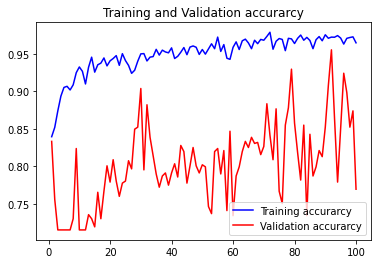

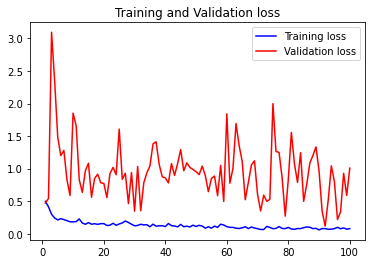

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [0]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
123/123 [==============================] - 0s 2ms/sample - loss: 1.0048 - acc: 0.7696
Test Accuracy: 76.96477174758911


In [0]:
# save the model to disk
#print("[INFO] Saving model...")
#pickle.dump(model,open('cnn_model.pkl', 'wb'))